# Spin Hamiltonian of the SiV$^-$ centre in diamond

$$
    H_{j} = H^0_j + H^{SO}_j + H^{JT}_j + H^{Z,L}_j + H^{Z,S}_j
$$
where $j = $ {g, e} for the ground and excited states respectively. $H^0$ is the unperturbed Hamiltonian defined by the electronic kinetic energy, the electronic potential and the Coulomb repulsion. $H^{SO}$ is the spin-orbit interaction, $H^{JT}$ is the Jahn Teller interaction, and $H^{Z,L}$ and $H^{Z,S}$ are the orbital and spin Zeeman terms.

Most specifically the total Hamiltonian can be written in the following formL

$$
    H_{j} = H^0_j +\lambda_j L_z S_z + \Upsilon^{JT}_j + f \gamma_L L_z B_z + \gamma_S S\cdot B
$$

For further details see:
Hepp, C. et al. (2014). Electronic Structure of the Silicon Vacancy Color Center in Diamond. Physical Review Letters, 112(3), 036405. https://doi.org/10.1103/PhysRevLett.112.036405


### Exercise:
Try to see whether you can reproduce the plots of the optical transitions as shown in lectures.

In [42]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import io, integrate, linalg, signal
from scipy.sparse.linalg import eigs

# use inline plotting
%matplotlib inline

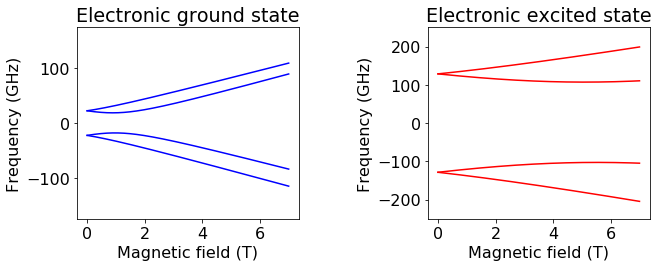

In [93]:
# SiV Spin Hamiltonian

lambda_g = 6.626e-34*45*1e9;
lambda_e = 6.626e-34*257*1e9;

# Define the spin orbit interaction matrices
H_SO_g = lambda_g/2*np.array([[0, 0, 1j,  0], [0, 0,  0, -1j],[-1j, 0,  0,  0],[0, 1j,  0,  0]]);
                 
H_SO_e = lambda_e/2*np.array([[0, 0, 1j, 0], [0, 0,  0, -1j], [-1j, 0, 0,  0], [ 0, 1j, 0,  0]]);
                 
mu_B = 9.274e-24;             
gamma_L = 0.5*mu_B*-0.1;
gamma_S = 0.5*2*mu_B;
                
B_length = 1000;
x = 7;
B = np.linspace(0,x,B_length);

# Reproduce Hepp
if 1:
    Bx = -B/np.sqrt(3);
    By = -B/np.sqrt(3);
    Bz = B/np.sqrt(3);

# Field along the z axis
if 0:
    x = 0.9;
    B = np.linspace(0,x,B_length);
    Bx = 0*B;
    By = 0*B;
    Bz = B;


# Field along the x axis
if 0:
    B = np.linspace(0.3,0.7,B_length);
    Bx = B/np.sqrt(2);
    By = B/np.sqrt(2);
    Bz = 0.1*B;

FreqG = np.zeros((B_length, 4))
FreqE = np.zeros((B_length, 4))
    
for iter in range(0,B_length):
    
    # Define the Zeeman interactions
    H_ZL = gamma_L*np.array([[0, 0, 1j*Bz[iter], 0], [0, 0, 0, 1j*Bz[iter]], [-1j*Bz[iter], 0, 0, 0], [0, -1j*Bz[iter], 0, 0]]);
            
    H_ZS = gamma_S*np.array([[Bz[iter],  Bx[iter]-1j*By[iter], 0, 0], [Bx[iter]+1j*By[iter], -Bz[iter], 0, 0], [0, 0, Bz[iter],  Bx[iter]-1j*By[iter]], [0, 0, Bx[iter]+1j*By[iter], -Bz[iter]]]);
            
    # Define the total Hamiltonians for the electronic ground and excited states
    H_tot_g = H_SO_g + H_ZL + H_ZS;
    H_tot_e = H_SO_e + H_ZL + H_ZS;

    # Energy levels and eigenvectors
    EG,VG = linalg.eig(H_tot_g);
    EG = np.real(EG);
    ind = np.argsort(EG); # sort the eigenvalues by their energies
    EG = EG[ind]
    VG = VG[:,ind]; # arrange the eigenvectors in order of energy

    # Express the frequency in GHz
    FreqG[iter,:] = EG/(6.626e-34*1e9); # (GHz)

    # Energy levels and eigenvectors
    EE,VE = linalg.eig(H_tot_e);
    EE = np.real(EE);
    ind = np.argsort(EE); # sort the eigenvalues by their energies
    EE = EE[ind]
    VE = VE[:,ind]; # arrange the eigenvectors in order of energy

    # Express the frequency in GHz
    FreqE[iter,:] = EE/(6.626e-34*1e9); # (GHz)
    

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.plot(B, FreqG,'b')
ax1.set_ylim(-175, 175)
ax1.set_xlabel(r'Magnetic field (T)')
ax1.set_ylabel(r'Frequency (GHz)')
ax1.set_title(r'Electronic ground state')

ax2.plot(B, FreqE,'r')
ax2.set_ylim(-250, 250)
ax2.set_xlabel(r'Magnetic field (T)')
ax2.set_ylabel(r'Frequency (GHz)')
ax2.set_title(r'Electronic excited state')
plt.subplots_adjust(wspace=2, hspace=2)

fig.tight_layout()